In [1]:
#imports 
import pandas as pd # data processing, CSV file I/O (e.. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import scale



# Plotly Packages
import plotly 
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print (plotly.__version__)
init_notebook_mode(connected=True)



# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

3.3.0


In [2]:
plotly.offline.init_notebook_mode(connected=True)
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])


In [3]:
data = pd.read_csv('/Users/elloumiaymen/Desktop/DataScience Academy /Kaggle Projects/Medical Cost/insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


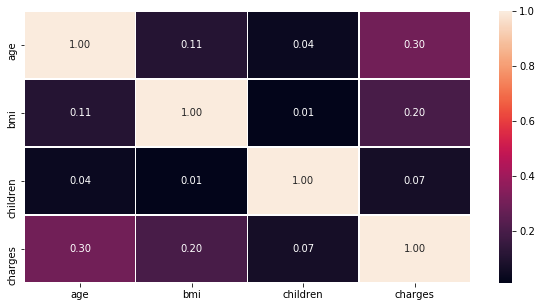

In [8]:
f,axis = plt.subplots(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()

In [9]:
Females =data['sex']=='female'
data_females=data[Females]
Males=data['sex']=='male'
data_males=data[Males]

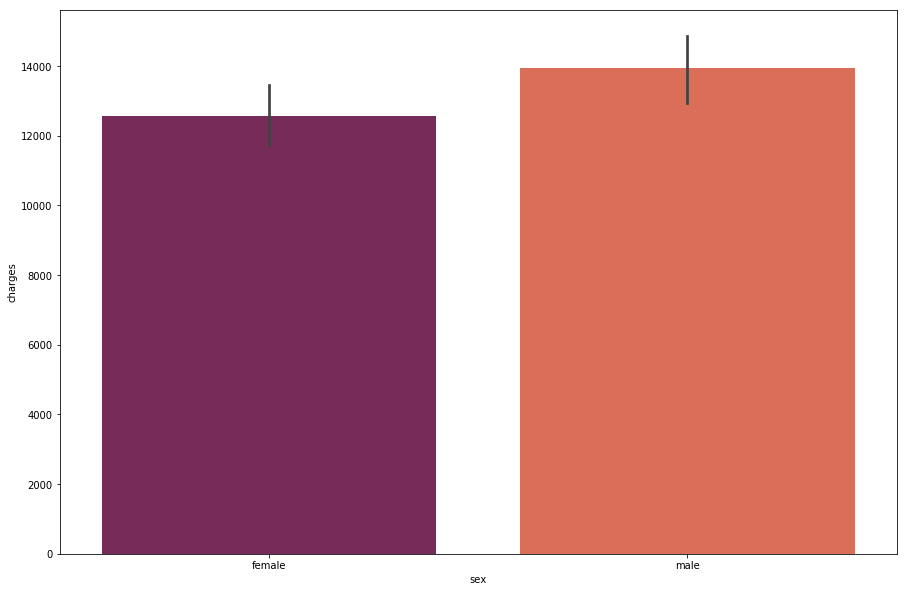

In [10]:
new_index=data.charges.sort_values(ascending=False).index.values
sorted_data=data.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.sex,y=sorted_data.charges,palette='rocket')
#Charges of male are much more important 

In [12]:


charge_dist = data["charges"].values
logcharge = np.log(data["charges"])


In [13]:


trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=False)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
plotly.offline.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')


In [16]:
data['age_cat'] = np.nan
lst = [data] # From list new data frame with new column category 

In [37]:
for col in lst:
        col.loc[(col['age']>=18) & (col['age']<=35),'age_cat'] = 'Young adults'
        col.loc[(col['age']> 35) & (col['age']<=60),'age_cat'] = ' Adults'
        col.loc[(col['age']> 60),'age_cat'] = 'Elderly People'


In [57]:
age_cat_Label = list(data["age_cat"].unique())
age_cat_amount = list(data["age_cat"].value_counts())



In [59]:
colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=age_cat_Label, values=age_cat_amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=[trace], layout=layout)
plotly.offline.iplot(fig, filename='basic_pie_chart')

Text(0.5,1,'Average Charges  According to Age Category')

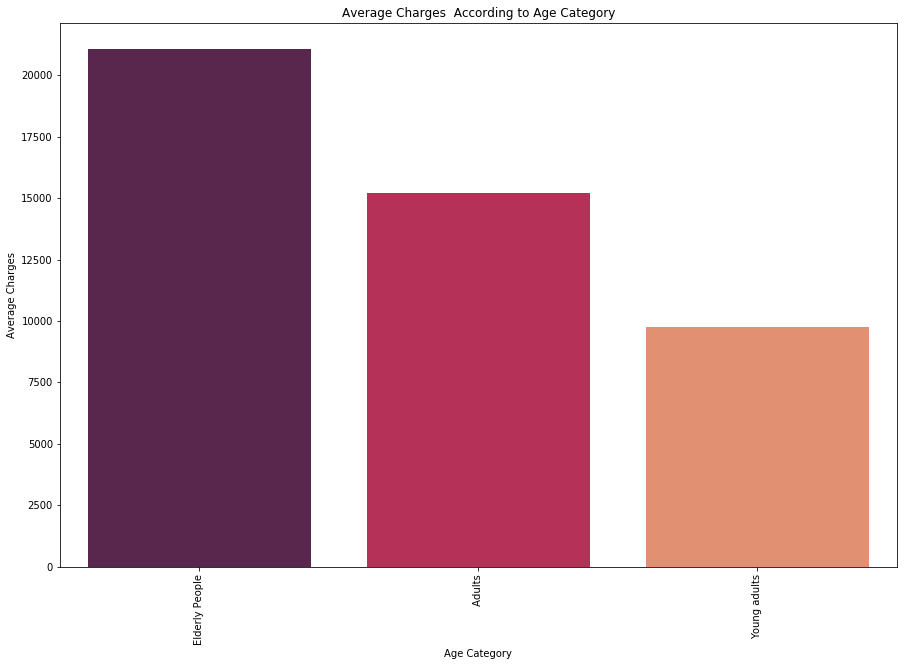

In [67]:
average_charges=[]

for i in age_cat_Label:
    x=data[data.age_cat==i]
    charges_average=sum(x.charges)/len(x)
    average_charges.append(charges_average)

df1=pd.DataFrame({'age_cat':age_cat_Label,'charges':average_charges})

new_index=df1.charges.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.age_cat,y=sorted_data.charges,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Age Category')
plt.ylabel('Average Charges')
plt.title('Average Charges  According to Age Category')



In [73]:
df = data

avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young adults"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == " Adults"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elderly People"].mean()

# Median
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young adults"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == " Adults"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elderly People"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Adults', 'Elderly People'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Adults', 'Elderly People'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Age Charges', bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')